# Homework 2



## Problem 1

The ground-state wave function $\psi(r)$ of a hydrogen atom is spherically symmetric and is found to be

$$
\psi(r) = \frac{1}{\sqrt{\pi} \ a_0^{3/2}} \ e^{-r/a_0}
$$

where $a_0$ is the Bohr radius. Recall that the probability density of finding the electron at a distance $r$ in any direction is given by $|\psi(r)|^2$ and the volume element in the spherically symmetric case is given by $dV = 4\pi r^2 dr$. 

Let us practice numerical integration with the hydrogen atom. You may find that doing the change of variable $x = r/a_0$ can make our life a lot easier.

**References**
- [Hydrogen atom](https://en.wikipedia.org/wiki/Hydrogen_atom), Wikipedia

In [1]:
# Import packages here
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from IPython.display import Markdown

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["text.usetex"] = True
######################################################################
#     In this homework, I need to do some changing variable 
#    and symbolic calculation, so I use 
#      - blue color to denote my calculation.
#      - darkblue color to denote my answer 
######################################################################
Answer = lambda ans: Markdown("""
<div style='color: blue!important'>%s</div>
"""%ans)

### Problem 1.1 (1 point)

Show that the wave function $\psi(r)$ is normalized, namely, show that

$$
\int_0^\infty |\psi(r)|^2 \cdot 4\pi r^2 dr = 1
$$

**Hint:** Doing the change of variable $x = r/a_0$, the integral becomes
$$
4 \int_0^\infty x^2 e^{-2x} dx 
$$

<div style='color:darkblue'><p>
    
---
Here let $f\left(x\right)=4x^2e^{-2x}$

$$
\begin{aligned}
 \int_0^\infty f\left(x\right) dx 
&= \int_{0}^{1}f\left(x\right)dx + \int_{1}^{\infty}f\left(x\right)dx,\quad 
\end{aligned}
$$
 
changing the variable $\displaystyle x\bigg|_{1}^{\infty} = \frac{1}{t}\bigg|_{1}^{0}$, with $\displaystyle dx = -\frac{1}{t^2}dt$. we have 
$$
\int_{1}^\infty f\left(x\right)dx 
= \int_{1}^{0} f\left(\frac{1}{t}\right)\frac{-1}{t^2}dt 
= \int_{0}^{1} \frac{1}{t^2}f\left(\frac{1}{t}\right)dt
$$
    
Then, in general, the integral from $0$ to $\infty$ becomes

$$
\int_0^\infty f\left(x\right) dx 
= \int_{0}^{1}\left(f\left(x\right)
+ \frac{1}{x^2}f\left(\frac{1}{x}\right)\right)dx
$$

</p></div>

In [2]:
# Write your code here
f = lambda x: 4*(x**2 * np.exp(-2*x))
F = lambda x: (f(x)+f(1/x)/x**2)

(int_f, err) = integrate.quad(F, 0.0, 1.0)

# - scipy.integrate.quad:
#     Using a technique from the Fortran library QUADPACK.
# - err: 
#     An estimate of the absolute error in the result.

Answer(r"$$ \int_0^\infty |\psi(r)|^2 \cdot 4\pi r^2 dr \approx %.16f$$"%int_f)


<div style='color: blue!important'>$$ \int_0^\infty |\psi(r)|^2 \cdot 4\pi r^2 dr \approx 1.0000000000000000$$</div>


### Problem 1.2 (2 points)

Calculate the probabilities of finding the electron in the following regions: $(a)\,0 \lt r \lt a_0$, $(b)\, a_0 \lt r \lt 2 a_0$, $(c)\, 2 a_0 \lt r \lt 3 a_0$, and $(d)\,3 a_0 \lt r $. Note that those probabilities should sum to $1$.

<div style='color:darkblue'><p>
    
---
After, Using the changing variable, the four region becomes
    
$$
\psi\left(r\right)
\begin{cases}
(a)& 0 a_0 \lt r \lt 1 a_0\\
(b)& 1 a_0 \lt r \lt 2 a_0\\
(c)& 2 a_0 \lt r \lt 3 a_0\\
(d)& 3 a_0 \lt r 
\end{cases}
,\quad \xrightarrow{x = r/a_0}
f\left(x\right)
\begin{cases}
(a)& 0 \lt x \lt 1\\
(b)& 1 \lt x \lt 2\\
(c)& 2 \lt x \lt 3\\
(d)& 3 \lt x 
\end{cases},
$$

where $f\left(x\right)$ is defined above, $f\left(x\right)=x^2e^{-2x}$, and also region $(d)$ need changing variable $\displaystyle x\bigg|_{3}^{\infty} = \frac{1}{t}\bigg|_{1/3}^{0}$

$$
\int_{3}^{\infty} f\left(x\right) dx 
=\int_{0}^{1/3}\frac{1}{x^2}f\left(\frac{1}{x}\right)dx
$$
    
    
</p></div>

In [3]:
# Write your code here
f = lambda x: 4*(x**2 * np.exp(-2*x))
F = lambda x: f(1/x)/x**2
(int_fa, ea) = integrate.quad(f, 0.0, 1.0)
(int_fb, eb) = integrate.quad(f, 1.0, 2.0)
(int_fc, ec) = integrate.quad(f, 2.0, 3.0)
(int_fd, ed) = integrate.quad(F, 0, 1/3)
int_ft = int_fa + int_fb + int_fc + int_fd

Answer(r"""
For four region, the probability are 

$$(a)\quad \int_0^1 |\psi(r)|^2 \cdot 4\pi r^2 dr \approx %.16f;$$

$$(b)\quad \int_1^2 |\psi(r)|^2 \cdot 4\pi r^2 dr \approx %.16f;$$

$$(c)\quad \int_2^3 |\psi(r)|^2 \cdot 4\pi r^2 dr \approx %.16f;$$

$$(d)\quad \int_3^\infty |\psi(r)|^2 \cdot 4\pi r^2 dr \approx %.16f.$$

To check total probability, summing all the region obtaining

$$
\left(\int_0^1+\int_1^2+\int_2^3+\int_3^\infty\right) |\psi(r)|^2 \cdot 4\pi r^2 dr = %.16f
$$
"""%(int_fa, int_fb, int_fc, int_fd, int_ft))


<div style='color: blue!important'>
For four region, the probability are 

$$(a)\quad \int_0^1 |\psi(r)|^2 \cdot 4\pi r^2 dr \approx 0.3233235838169366;$$

$$(b)\quad \int_1^2 |\psi(r)|^2 \cdot 4\pi r^2 dr \approx 0.4385731106295191;$$

$$(c)\quad \int_2^3 |\psi(r)|^2 \cdot 4\pi r^2 dr \approx 0.1761345011368854;$$

$$(d)\quad \int_3^\infty |\psi(r)|^2 \cdot 4\pi r^2 dr \approx 0.0619688044166589.$$

To check total probability, summing all the region obtaining

$$
\left(\int_0^1+\int_1^2+\int_2^3+\int_3^\infty\right) |\psi(r)|^2 \cdot 4\pi r^2 dr = 1.0000000000000000
$$
</div>


### Problem 1.3 (3 points)

The Hamiltonian operator $\hat{\mathcal{H}}$ in the spherically symmetric case reduces to

$$
\hat{\mathcal{H}} = -\frac{\hbar^2}{2\mu} \left( \frac{d^2}{dr^2} + \frac{2}{r} \frac{d}{dr} \right)
                  - \frac{e^2}{4\pi \epsilon_0 r}
$$

where $\mu = m_e m_p / (m_e + m_p)$. Calculate the ground-state energy $E$ of the hydrogen atom, namely, calculate the expectation value of $\hat{\mathcal{H}}$ with $\psi(r)$:

$$
E = \int_0^\infty \psi^*(r) 
                  \left[ -\frac{\hbar^2}{2\mu} \left( \frac{d^2}{dr^2} + \frac{2}{r} \frac{d}{dr} \right)
                         - \frac{e^2}{4\pi \epsilon_0 r} \right] \psi(r) \cdot 4\pi r^2 dr
$$

Give your answer in units of $\text{eV}$. 

**Hint:** Doing the change of variable $x = r/a_0$, the integral becomes

$$
E = -4 \left(\frac{\hbar^2}{2 \mu a_0^2}\right) \int_0^\infty x^2 e^{-2x} dx
  + 8 \left(\frac{\hbar^2}{2 \mu a_0^2}\right) \int_0^\infty x e^{-2x} dx
  - 4 \left(\frac{e^2}{4 \pi \epsilon_0 a_0}\right) \int_0^\infty x e^{-2x} dx
$$

The value you get should be close to $-13.6 \ \text{eV}$. 
<div style='color:darkblue'><p>
    
---
For three different function we define
- $f_1\left(x\right) = x^2 e^{-2x}$
    
- $f_2\left(x\right) = x e^{-2x}$
    
- $f_3\left(x\right) = x e^{-2x}$

and also using the same changing variable technic to intergrate over $0$ to $\infty$. And the coefficients are donoted by
    
- $\displaystyle C_1 = - 4 \left(\frac{\hbar^2}{2 \mu a_0^2}\right) $ 
    
- $\displaystyle C_2 = + 8 \left(\frac{\hbar^2}{2 \mu a_0^2}\right) $ 
    
- $\displaystyle C_3 = - 4 \left(\frac{e^2}{4 \pi \epsilon_0 a_0}\right) $ 

</p></div>

In [4]:
# Write your code here
f1 = lambda x: x**2*np.exp(-2*x)
f2 = lambda x: x**1*np.exp(-2*x)
f3 = lambda x: x**1*np.exp(-2*x)

F1 = lambda x: f1(x)+f1(1/x)/x**2
F2 = lambda x: f2(x)+f2(1/x)/x**2
F3 = lambda x: f3(x)+f3(1/x)/x**2

(int_f1, e1) = integrate.quad(F1, 0.0, 1.0)
(int_f2, e2) = integrate.quad(F2, 0.0, 1.0)
(int_f3, e3) = integrate.quad(F3, 0.0, 1.0)

#######################################################################################
### Reference: CODATA #################################################################
### https://physics.nist.gov/cuu/Constants/index.html #################################
hbar     = 1.054571817 * 1e-34    # reduced Planck constant ( J s )
me       = 9.1093837015 * 1e-31   # electron mass ( kg )
mp       = 1.67262192369 * 1e-27  # proton mass ( kg )
mu       = me*mp/(me+mp)          # recuded mass ( kg )
epsilon0 = 8.8541878128 * 1e-12   # vacuum electric permittivity ( F / m)
e        = -1.602176634 * 1e-19   # elementary charge ( C )
a0       = 5.29177210903 * 1e-11  # Bohr radius ( m )
pi       = 3.141592653589793      # mathematical constant ( 1 )
#######################################################################################
#######################################################################################
C1 = -4 * (hbar**2/2/mu/a0**2)
C2 =  8 * (hbar**2/2/mu/a0**2)
C3 = -4 * (e**2/4/pi/epsilon0/a0)
# pluggin to the formula above
E_J = C1 * int_f1 + C2 * int_f2 + C3 * int_f3 # ( J )

# then transver the energy unit from J to eV
E_e = E_J/abs(e)

Answer(r"""
The numerical solution for hydrogen energy for ground satate is
$$
\left\langle\psi_0\left|\,\hat{\mathcal{H}}\,\right|\psi_0\right\rangle \approx %.5f {\,\rm eV}
$$
"""%E_e)


<div style='color: blue!important'>
The numerical solution for hydrogen energy for ground satate is
$$
\left\langle\psi_0\left|\,\hat{\mathcal{H}}\,\right|\psi_0\right\rangle \approx -13.59828 {\,\rm eV}
$$
</div>


## Problem 2

We have seen that Newton-Raphson method has very rapid local convergence. However, the method's global convergence properties are unpredictable. That is, outside the region of quadratic convergence, the method is very sensitive to the choice of starting point.

To see this, consider the simple (complex) equation

$$
z^3 - 1 = 0
$$

whose three roots are $1$, $-\frac{1}{2}+i\frac{\sqrt{3}}{2}$, and $-\frac{1}{2}-i\frac{\sqrt{3}}{2}$. Newton-Raphson method can be used in the complex plane and gives the iteration

$$
z_{j+1} = z_j - \frac{z_j^3 - 1}{3 z_j^2}
$$

Depending on the starting point $z_0$, we expect the method to arrive at one of the three roots. By symmetry, we can even expect that the complex plane will be divided into three regions of identical shapes, each corresponding to one of the three roots. It turns out that these expectations are correct, but surprisingly the boundary of those regions is highly irregular, in fact, it is **fractal**. 

<img src='Wiki_NewtonFractal.png' width='500' height='400'>

Here the three colors, red, green, and blue, correspond to the points that will lead the method to arrive at $1$, $-\frac{1}{2}+i\frac{\sqrt{3}}{2}$, and $-\frac{1}{2}-i\frac{\sqrt{3}}{2}$, respectively. 

Let us try to reproduce this fractal in this exercise.

**References**
- [Newton fractal](https://en.wikipedia.org/wiki/Newton_fractal), Wikipedia

In [5]:
# Import packages here
from scipy.optimize import newton
def Newton(f, x0, fprime=None, n=1):
    h = 1e-8
    if fprime==None:
        fprime = lambda x: (f(x+h)-f(x-h))/2/h
    for i in range(n):
        x0 = x0 - f(x0)/fprime(x0)
    return x0

### Problem 2.1 (1 point)

Let us first make sure you know how to use Newton-Raphson method in the complex plane. 

In Python, a complex number $z = x + iy$ can be assigned by
```python
z = x + y*(0+1j)
```
Note that in Python the imaginary number $i$ is represented by `j`. Define the complex function $f(z) = z^3 - 1$ and its derivative $f'(z) = 3z^2$. Use Newton-Raphson method to solve $f(z) = 0$ with $z_0 = 0.5$, $z_0 = 0.5i$, and $z_0 = -0.5i$. You should get $z^* = 1$, $z^* = -\frac{1}{2}+i\frac{\sqrt{3}}{2}$, and $z^* = -\frac{1}{2}-i\frac{\sqrt{3}}{2}$, respectively.

In [6]:
# Write your code here
f = lambda z: z**3 - 1
fprime = lambda z: 3*z**2

z1 = newton(f, 0.5+0.0j, fprime = fprime)
z2 = newton(f, 0.0+0.5j, fprime = fprime)
z3 = newton(f, 0.0-0.5j, fprime = fprime)

roots = np.array([z1,z2,z3])

Answer(r"""
For the function $f(z)=z^3-1$,
soving $0=f(z)$ near intial value $z_0=0.5$ $z_0 = 0.5i$, and $z_0 = -0.5i$. 
The solution is

- $z^*=(%.8f)+i\cdot(%.8f)\quad$, near $z_0=0$:

- $z^*=(%.8f)+i\cdot(%.8f)\quad$, near $z_0=0.5i$:

- $z^*=(%.8f)+i\cdot(%.8f)\quad$, near $z_0=-0.5i$:

"""%(z1.real,z1.imag, z2.real,z2.imag, z3.real,z3.imag))


<div style='color: blue!important'>
For the function $f(z)=z^3-1$,
soving $0=f(z)$ near intial value $z_0=0.5$ $z_0 = 0.5i$, and $z_0 = -0.5i$. 
The solution is

- $z^*=(1.00000000)+i\cdot(0.00000000)\quad$, near $z_0=0$:

- $z^*=(-0.50000000)+i\cdot(0.86602540)\quad$, near $z_0=0.5i$:

- $z^*=(-0.50000000)+i\cdot(-0.86602540)\quad$, near $z_0=-0.5i$:

</div>


### Problem 2.2 (3 points)

Now repeat the process over the complex domain, $-1 \le x \le 1$ and $-1 \le y \le 1$. Use $1000$ points to represent the interval $[-1, 1]$ for both $x$ and $y$. So you are going to repeat the process $10^6$ times. Remember to bookkeep which root you get with a certain starting point. Then make a scatter plot of $z^*$ versus $(x,y)$. Color-code the points according to $z^*$. You should see the same fractal in your plot.

**ps.** The whole calculation should take less than $10$ minutes.

<div style='color:darkblue'><p>

---

Solving the equation $0=f(z)$, where $z\in\mathbb{C}$ and $$f(z) = z^3-1.$$ Using the Newton-Raphson method run over the complex plane $$z=x+iy,\quad x,y=[-1,1].$$ Since, in numerical calculation, the array is discrete, we seperate the plane into $n\times n$ points.

</p></div>
<div style='color:darkblue!important'><p>
    
In matplotlib, the actual size of figure is given by `size = dpi*figsize`.Here, we have $n\times n$ points on the points, in order to map every points into pixels, I use some trick in following code.
- [wikipedia: dpi ( dots per inch ) ](https://en.wikipedia.org/wiki/Dots_per_inch)
- [cnblogs: relationship between dpi and figsize](https://www.cnblogs.com/lijunjie9502/p/10327151.html)
</p></div>

<center><div style='color:red!important'>
The whole calculation
</div></center>

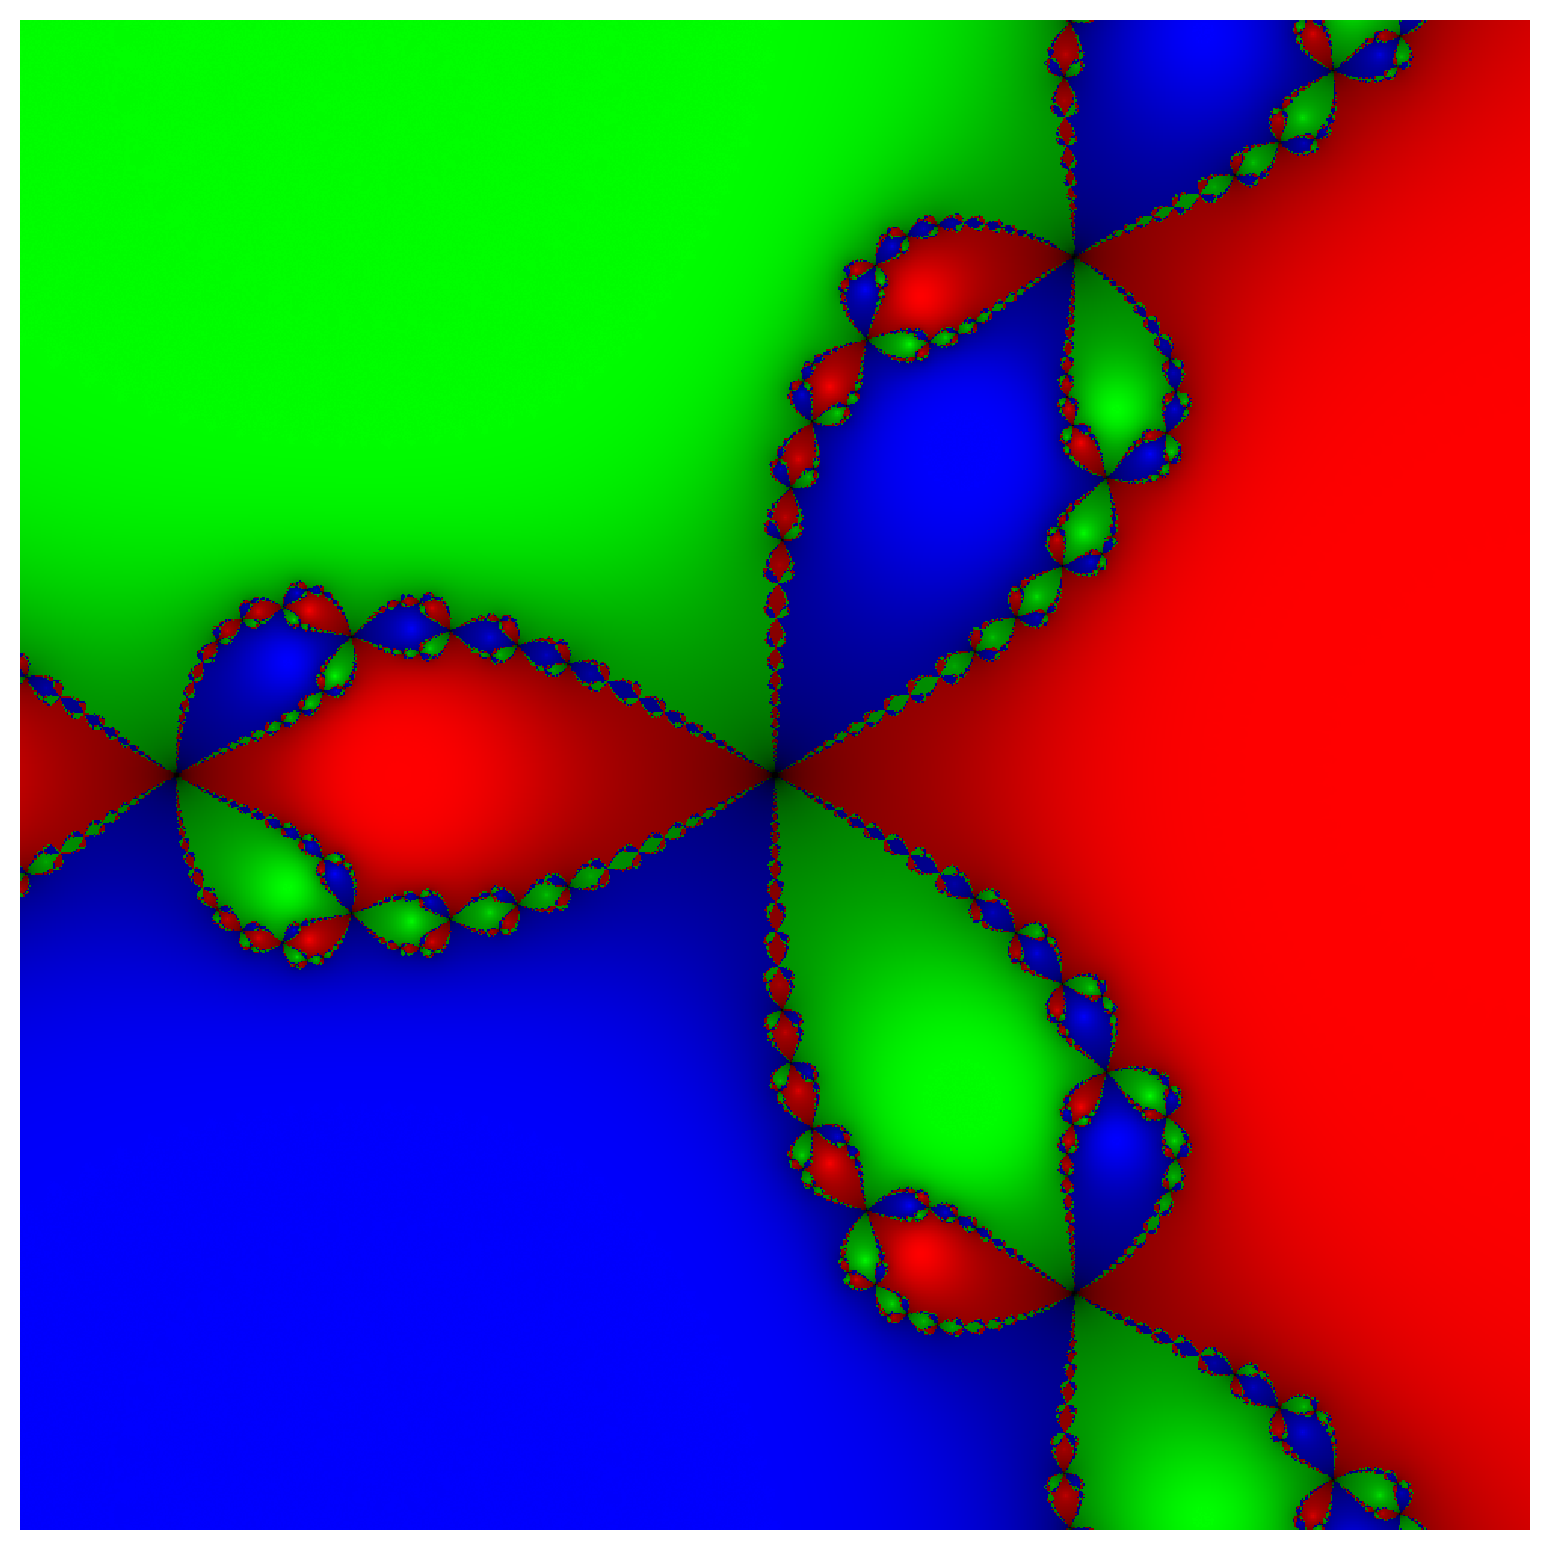

In [7]:
# Write your code here
# ------ iteration function ---------------------------------------------------------
f      = lambda z: z**3 - 1           # function f(z)
fprime = lambda z: 3*z**2             # derivative function f'(z)
# ------ generate z0 ----------------------------------------------------------------
n = 1000                              # total number of points = n*n
x = np.linspace(-1,1,n)               # from -1 to 1, make n points
(z0_r, z0_i) = np.meshgrid(x,x*1j)    # make a meshgrid for complex grid
z0 = z0_r + z0_i                      # make a grid with complex number

# ------ solving z* -----------------------------------------------------------------
z  = newton(f, z0, fprime=fprime)     # solving 0 = f(z) for every points
z_ = Newton(f, z0, fprime=fprime, n=6)# solving 0 = f(z) only 6 step

# ------ solving min distance -------------------------------------------------------
roots_n = roots.size                  # here roots_n = 3
dis     = np.zeros([roots_n, n, n])   # (real number) make a grid with shape: (3,n,n)
dis_    = np.zeros([roots_n, n, n])   # (real number) make a grid with shape: (3,n,n)
for i in range(roots_n):              # for every roots of function 
    dis[i]  = np.abs(z  - roots[i])   # calculate the distance for every point
    dis_[i] = np.abs(z_ - roots[i])   # calculate the distance for every point

min_dis = (np.round(dis)==0)*1.0      # If the distance ~ 0, set 1, else 0.

# ------ these code is for make a scale to add some shadow --------------------------
scale   = dis_/4
scale = 1.0 - 0.5*scale**0.1
scale[scale>1.0] = 1.0
scale[scale<0.0] = 0.0


# ------ saving image ---------------------------------------------------------------
min_dis = min_dis * scale                   # changing color: This step is redundant!
img = np.transpose(min_dis,(1,2,0))   # changing shape: (3,n,n) -> (n,n,3)

# ------ plot the image -------------------------------------------------------------
dpi = 100
fig = plt.figure(dpi=2*dpi, figsize=(n/dpi, n/dpi))
plt.imshow((img*255).astype(np.uint8), interpolation='nearest',origin='lower')
plt.axis('off')
plt.show()

## Problem 3

Here let us play with the Legendre polynomial of degree $10$, $P_{10}(x)$.

**References**
- [Legendre polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials), Wikipedia

In [8]:
# Import packages here
from numpy.polynomial.legendre import legval
from numpy.polynomial import Legendre
from scipy.optimize import bisect    

### Problem 3.1 (1 point)

Plot $P_{10}(x)$ versus $x$, for $-1 \le x \le 1$, and print out its roots.

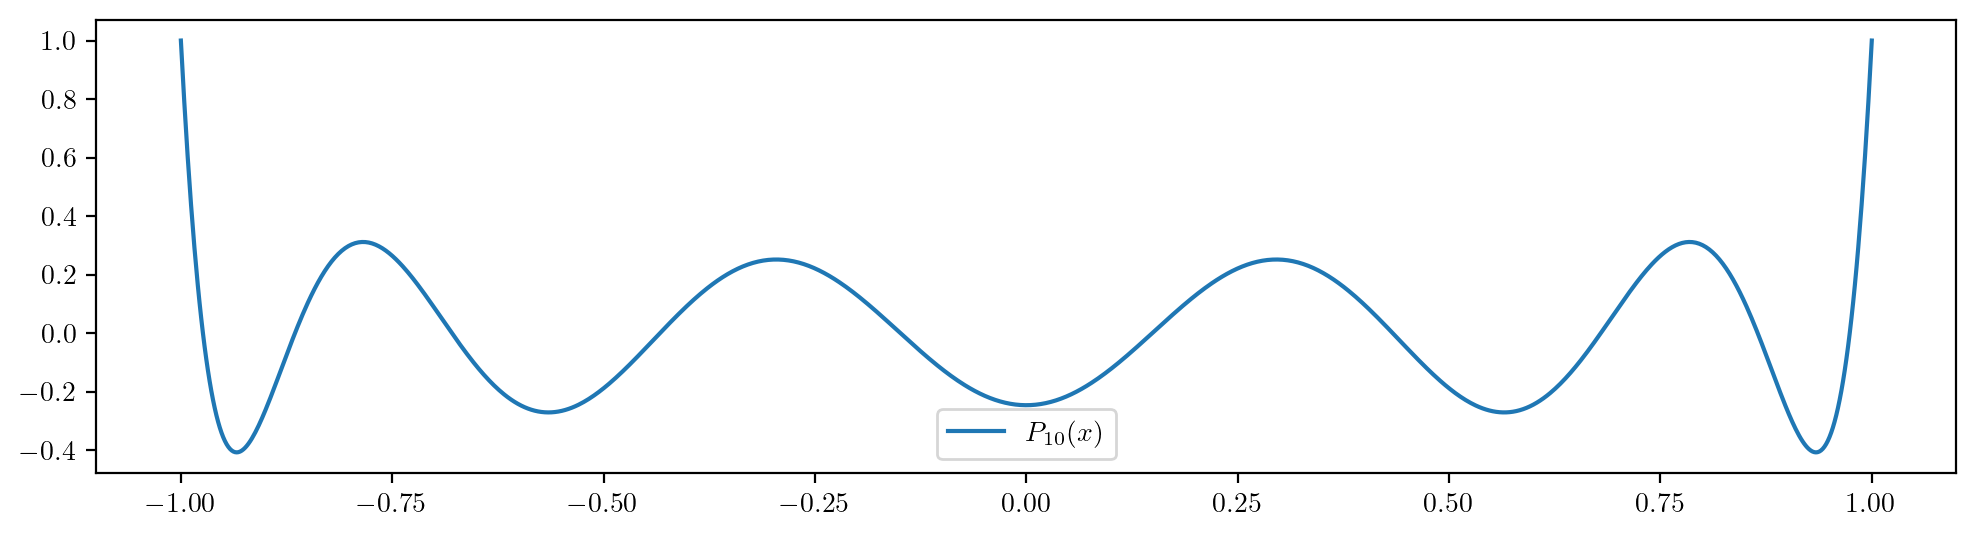

In [9]:
# Write your code here
P10 = Legendre([0,0,0,0,0,0,0,0,0,0,1])
x = np.linspace(-1,1,1000)
y = P10(x)

plt.figure(dpi=200,figsize=(12,3))
plt.plot(x, y, label='$P_{10}(x)$')
plt.legend()
plt.show()

### Problem 3.2 (3 points)

Find the roots of $P_{10}(x)$ using the bisection method. You can set up a coarse grid and then run over the grid to find out the brackets.
> color in matplotlib: [link](https://matplotlib.org/stable/_images/sphx_glr_named_colors_003_2_0x.png)

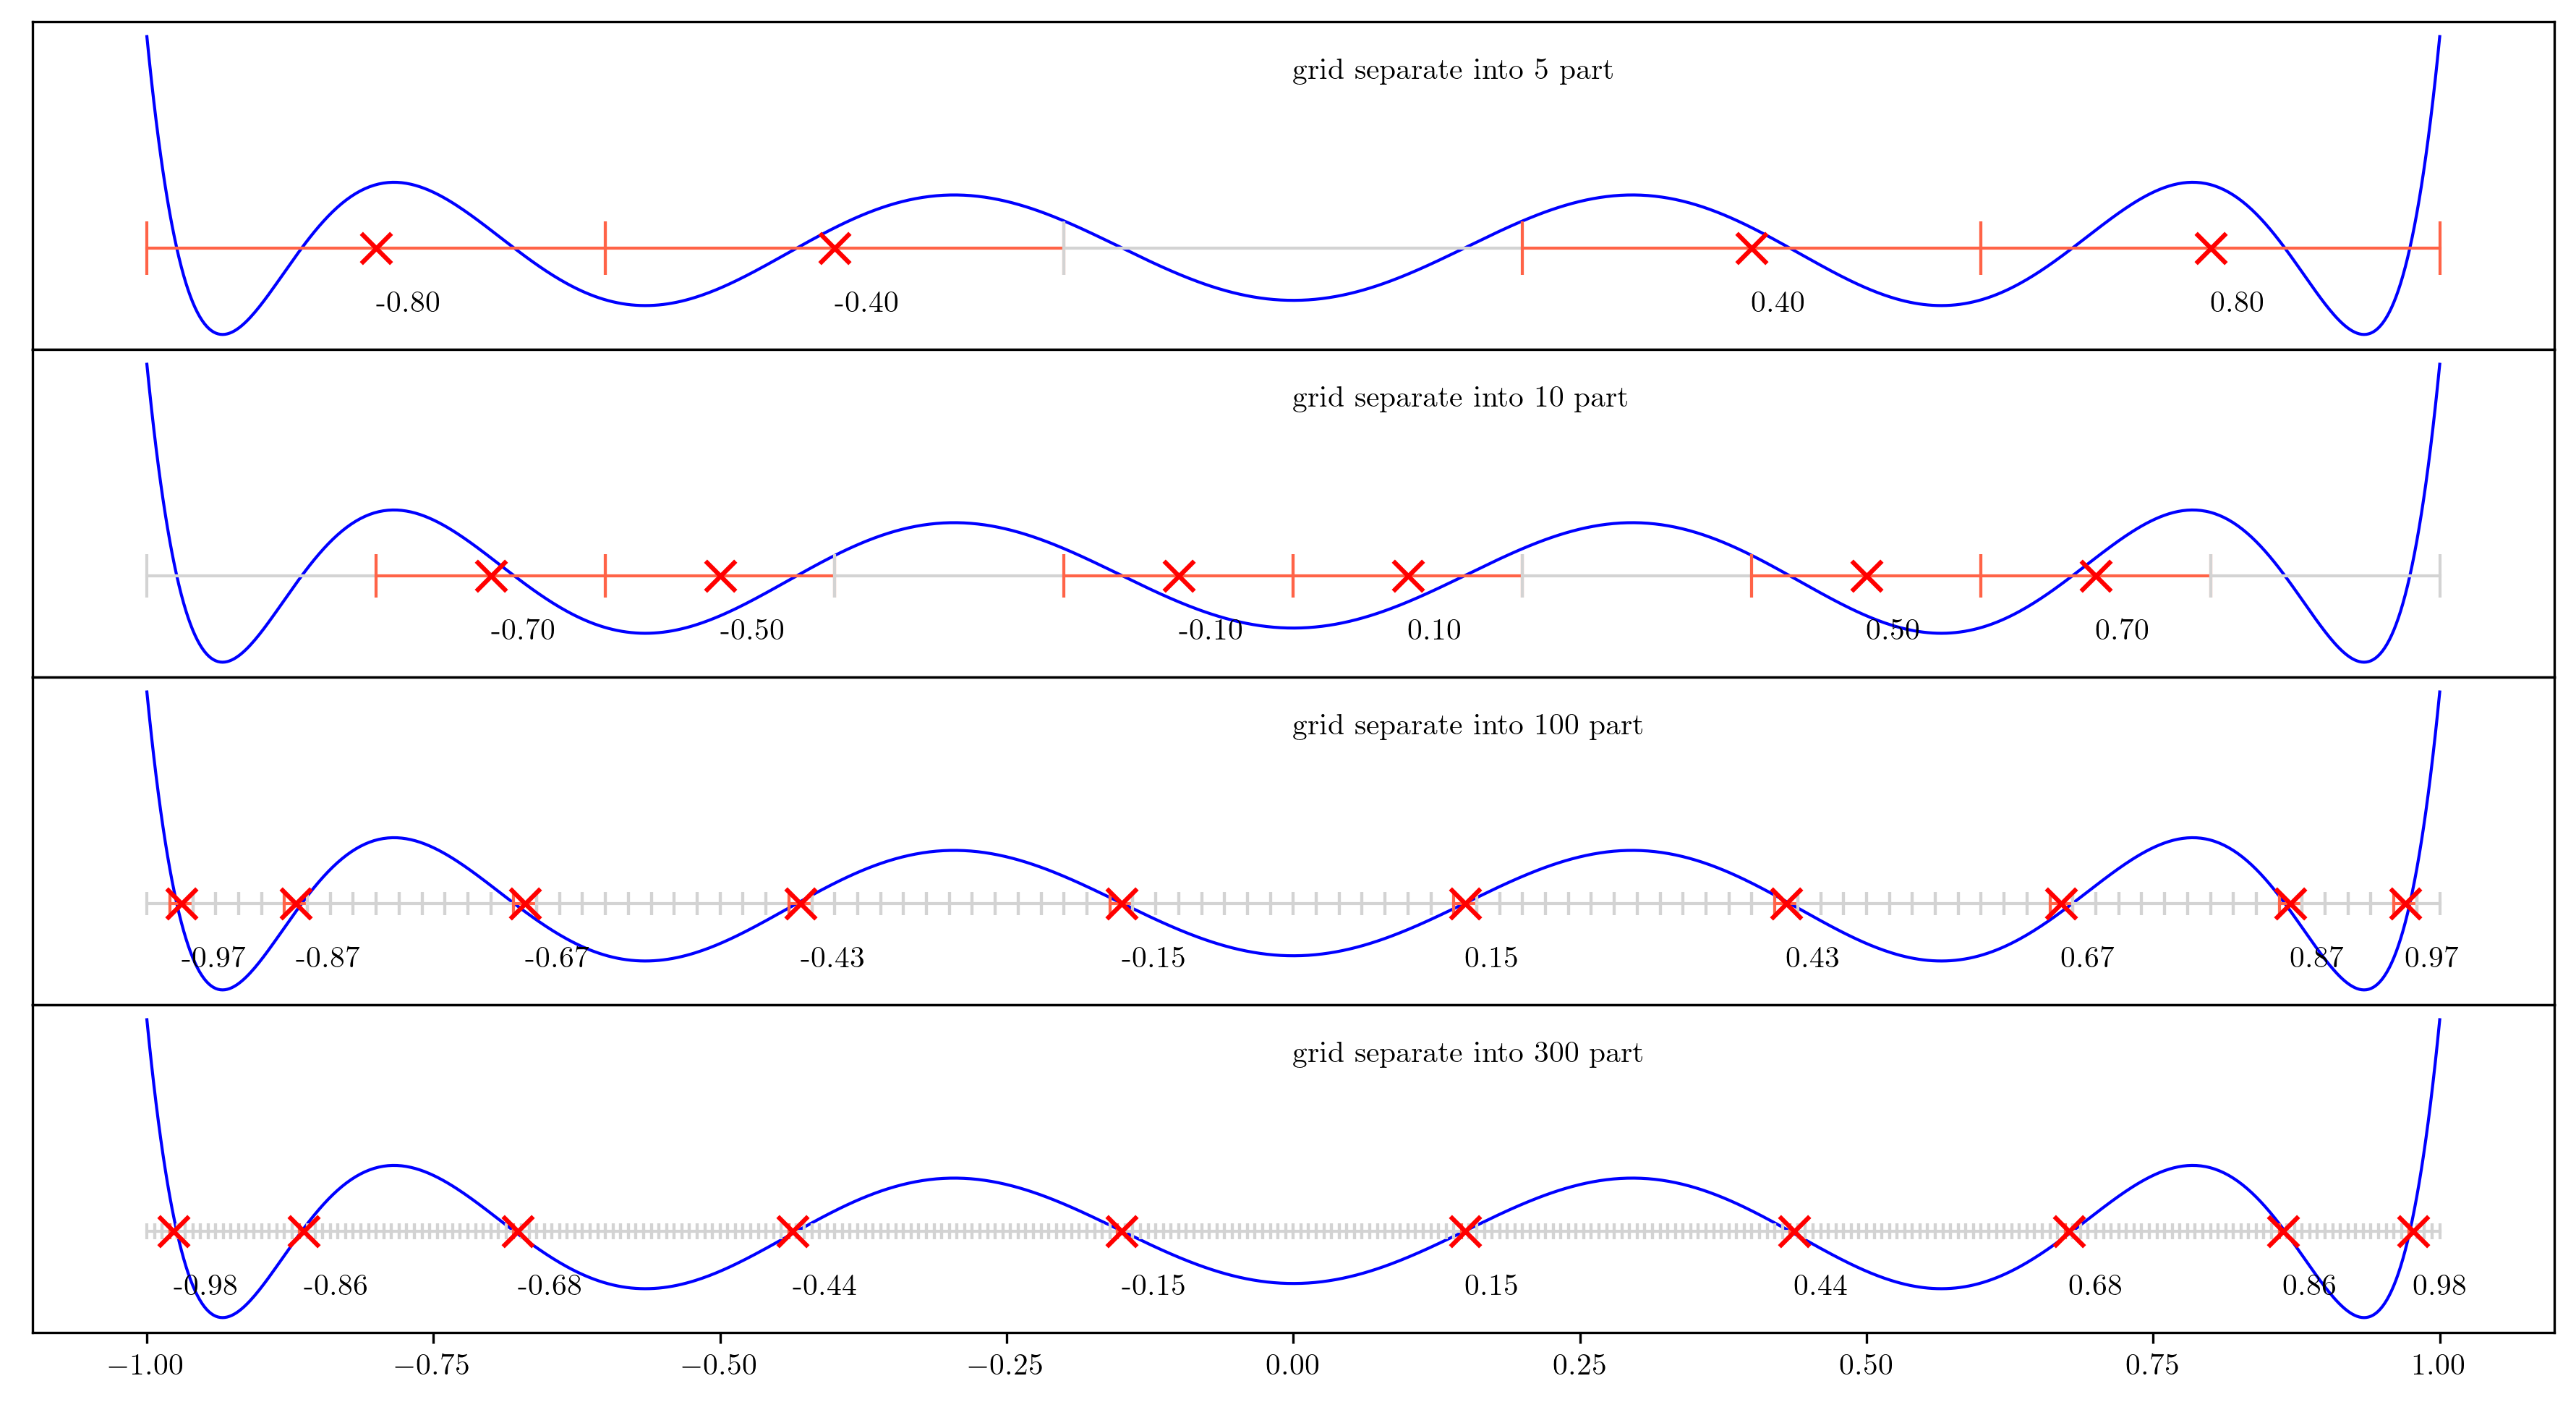


<div style='color: blue!important'>There are $10$ solution for solving $0 = f\left(x\right).$ 
 <ul><li>$1$'s solution is $x\approx-0.9766666667$</li>
<li>$2$'s solution is $x\approx-0.8633333333$</li>
<li>$3$'s solution is $x\approx-0.6766666667$</li>
<li>$4$'s solution is $x\approx-0.4366666667$</li>
<li>$5$'s solution is $x\approx-0.1500000000$</li>
<li>$6$'s solution is $x\approx+0.1500000000$</li>
<li>$7$'s solution is $x\approx+0.4366666667$</li>
<li>$8$'s solution is $x\approx+0.6766666667$</li>
<li>$9$'s solution is $x\approx+0.8633333333$</li>
<li>$10$'s solution is $x\approx+0.9766666667$</li>
</ul></div>


In [10]:
# Write your code here
P3 = Legendre([0,0,0,1])
P10 = Legendre([0,0,0,0,0,0,0,0,0,0,1])
P20 = Legendre([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])

f = P10 # you may change any function above, P10 is Legendre with order 10.

valid_interval = lambda f,x0,x1: f(x0)*f(x1) < 0
def bisect(f,x):
    n = x.size
    c = np.zeros(n-1)
    for i in range(n-1):
        c[i] = valid_interval(f,x[i],x[i+1])
    return c

N = [5,10,100,300]
fig, ax = plt.subplots(len(N),1, dpi=300, figsize=(15,2*len(N)))
for ni in range(len(N)):
    n = N[ni] + 1
    x = np.linspace(-1, 1, n)
    c = bisect(f, x)
    sols = np.array([])
    
    x_ = np.linspace(-1,1,1000)
    ax[ni].plot(x_, f(x_), label='$P_{10}(x)$', color='blue', linewidth=1, zorder=1)
    for i in range(len(c)):
        if c[i] == 1:
            ax[ni].plot([x[i],x[i+1]],[0,0],color='tomato',marker='|',linewidth=1, markersize=30/n**0.3, zorder=2)
            sols = np.append(sols,(x[i]+x[i+1])/2)
        if c[i] == 0:
            ax[ni].plot([x[i],x[i+1]],[0,0],color='lightgray',marker='|',linewidth=1, markersize=30/n**0.3, zorder=2)
    for i in range(len(sols)):
        ax[ni].scatter(sols[i],0,marker='x',color='red', s=100, zorder=3)
        ax[ni].annotate("%.2f"%sols[i], (sols[i], -0.3), color='black', zorder=4)
    ax[ni].set_yticks([])
    if ni!=len(N)-1: ax[ni].set_xticks([])
    ax[ni].annotate("grid separate into %d part"%N[ni], (0.0, 0.8), color='black', zorder=4)
plt.subplots_adjust(hspace=0)
plt.show()

ans = "There are $%d$ solution for solving $0 = f\\left(x\\right).$ \n <ul>"%len(sols)
for i in range(len(sols)):
    if sols[i]>0:
        ans += "<li>$%d$'s solution is $x\\approx+%.10f$</li>\n"%(i+1,sols[i])
    else:
        ans += "<li>$%d$'s solution is $x\\approx%.10f$</li>\n"%(i+1,sols[i])
ans += "</ul>"
Answer(ans)


### Problem 3.3 (3 points)

Find the roots of $P_{10}(x)$ using the matrix techniques.

<div style='color:darkblue'><p>

---

In linear algebra, the Frobenius [companion matrix](https://en.wikipedia.org/wiki/Companion_matrix) of the monic polynomial
$$
P(t)=c_{0}+c_{1}t+\cdots +c_{{n-1}}t^{{n-1}}+t^{n},
$$
is the square matrix defined as
$$
C = 
\left( \begin{array}{ccccc}
       0 & 1 & 0 & \cdots & 0 \\
       0 & 0 & 1 & \cdots & 0 \\
       0 & 0 & 0 & \ddots & \vdots \\
       \vdots & \vdots & \ddots & 0 & 1 \\
       -c_0 & -c_1 & \cdots & -c_{n-2} & -c_{n-1}
\end{array} \right)_{n\times n}
$$
    
</p></div>

In [11]:
P10 = Legendre([0,0,0,0,0,0,0,0,0,0,1])
f = P10
c = f.convert(kind=np.polynomial.Polynomial).coef
c = c/c[len(c)-1]
C = np.eye(c.size-1,k=1)
for i in range(c.size-1): C[c.size-2,i]=-c[i]
sols = np.linalg.eigvals(C)

# ------------------------------------------------------------------------------------
sols = np.sort(sols)
ans = "There are $%d$ solution for solving $0 = f\\left(x\\right).$ \n <ul>"%len(sols)
for i in range(len(sols)):
    if sols[i]>0:
        ans += "<li>$%d$'s solution is $x\\approx+%.10f$</li>\n"%(i+1,sols[i])
    else:
        ans += "<li>$%d$'s solution is $x\\approx%.10f$</li>\n"%(i+1,sols[i])
ans += "</ul>"
Answer(ans)


<div style='color: blue!important'>There are $10$ solution for solving $0 = f\left(x\right).$ 
 <ul><li>$1$'s solution is $x\approx-0.9739065285$</li>
<li>$2$'s solution is $x\approx-0.8650633667$</li>
<li>$3$'s solution is $x\approx-0.6794095683$</li>
<li>$4$'s solution is $x\approx-0.4333953941$</li>
<li>$5$'s solution is $x\approx-0.1488743390$</li>
<li>$6$'s solution is $x\approx+0.1488743390$</li>
<li>$7$'s solution is $x\approx+0.4333953941$</li>
<li>$8$'s solution is $x\approx+0.6794095683$</li>
<li>$9$'s solution is $x\approx+0.8650633667$</li>
<li>$10$'s solution is $x\approx+0.9739065285$</li>
</ul></div>
